Testing the back normalscore transformation
========


In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib    
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= pygslib.gslib.read_gslib_file('../data/cluster.dat')  

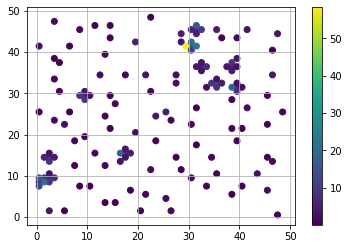

In [3]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

## The nscore transformation table function


In [4]:
print (pygslib.gslib.__dist_transf.backtr.__doc__)

va,error = backtr(vnsc,transin,transout,ltail,utail,ltpar,utpar,zmin,zmax,getrank,[nd,nt])

Wrapper for ``backtr``.

Parameters
----------
vnsc : input rank-1 array('d') with bounds (nd)
transin : input rank-1 array('d') with bounds (nt)
transout : input rank-1 array('d') with bounds (nt)
ltail : input int
utail : input int
ltpar : input float
utpar : input float
zmin : input float
zmax : input float
getrank : input int

Other Parameters
----------------
nd : input int, optional
    Default: len(vnsc)
nt : input int, optional
    Default: len(transin)

Returns
-------
va : rank-1 array('d') with bounds (nd)
error : int



## Get the transformation table

In [5]:
transin,transout, error = pygslib.gslib.__dist_transf.ns_ttable(mydata['Primary'],mydata['Declustering Weight'])
print ('there was any error?: ', error!=0)

there was any error?:  False


## Get the normal score transformation

Note that the declustering is applied on the transformation tables

In [6]:
mydata['NS_Primary'] = pygslib.gslib.__dist_transf.nscore(mydata['Primary'],transin,transout,getrank=False)

<AxesSubplot:>

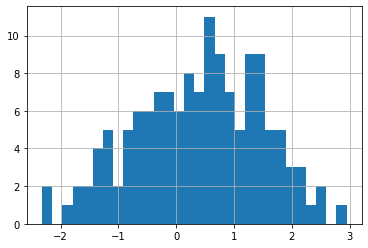

In [7]:
mydata['NS_Primary'].hist(bins=30)

## Doing the back transformation

In [8]:
mydata['NS_Primary_BT'],error = pygslib.gslib.__dist_transf.backtr(mydata['NS_Primary'],
                                     transin,transout,
                                     ltail=1,utail=1,ltpar=0,utpar=60,
                                     zmin=0,zmax=60,getrank=False)
print ('there was any error?: ', error!=0, error)

there was any error?:  False 0


array([[<AxesSubplot:title={'center':'Primary'}>,
        <AxesSubplot:title={'center':'NS_Primary_BT'}>]], dtype=object)

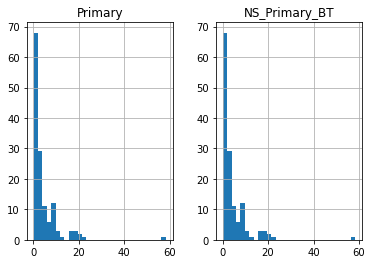

In [9]:
mydata[['Primary','NS_Primary_BT']].hist(bins=30)

In [10]:
mydata[['Primary','NS_Primary_BT', 'NS_Primary']].head()

,Primary,NS_Primary_BT,NS_Primary
0,0.06,0.06,-2.318555
1,0.06,0.06,-2.318555
2,0.08,0.08,-1.908162
3,0.09,0.09,-1.773658
4,0.09,0.09,-1.773658
